In [28]:
import cv2
import numpy as np
from keras.models import load_model
from PIL import Image
from skimage import transform
from matplotlib.pyplot import imshow

%matplotlib inline

In [5]:
def crop_center_square(image):
    img_height, img_width = image.shape[0:2]
    min_dim = min(img_height, img_width)
    start_x = (img_width // 2) - (min_dim // 2)
    start_y = (img_height // 2) - (min_dim // 2)
    
    img = image[start_y : start_y + min_dim, start_x : start_x + min_dim]
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

In [22]:
labels = {0: "Daisy",
          1: "Dandelion", 
          2: "Lily", 
          3: "Orchid", 
          4: "Rose", 
          5: "Sunflower", 
          6: "Tulip"}

In [4]:
model = load_model('./transfer_learning_results/densenet121_model.hdf5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 dense_2 (Dense)             (None, 256)               262400    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 7,301,703
Trainable params: 264,199
Non-trainable params: 7,037,504
_________________________________________________________________


'Tulip'

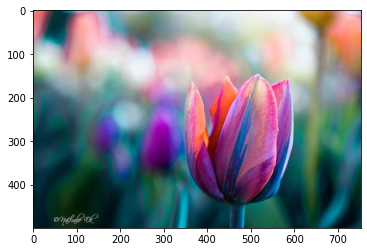

In [41]:
img_size = 224
# image_name = './data/flowers/test/daisy/10124715864_c4b6207520_o.jpg'
# image_name = './data/flowers/test/dandelion/10176339595_05fb47c4c4_k.jpg'
# image_name = './data/flowers/test/lily/10007046385_d26421090c_o.jpg'
# image_name = './data/flowers/test/orchid/1012229979_3ecc9f9859_o.jpg'
# image_name = './data/flowers/test/rose/10065206693_6de56fd60e_o.jpg'
# image_name = './data/flowers/test/sunflower/1000235152_90f986fbb5_c.jpg'
image_name = './data/flowers/test/tulip/10005307274_56b62484cd_o.jpg'


img = Image.open(image_name)
imshow(img) #show image
img = np.array(img).astype("float32")/255
img = crop_center_square(img)
img = transform.resize(img, (img_size, img_size, 3))
img = np.expand_dims(img, axis = 0)

prediction = model.predict(img)
labels[np.argmax(prediction)]